## 1.2 Visualize results

Corresponding image for frame 10: img_0010.jpg


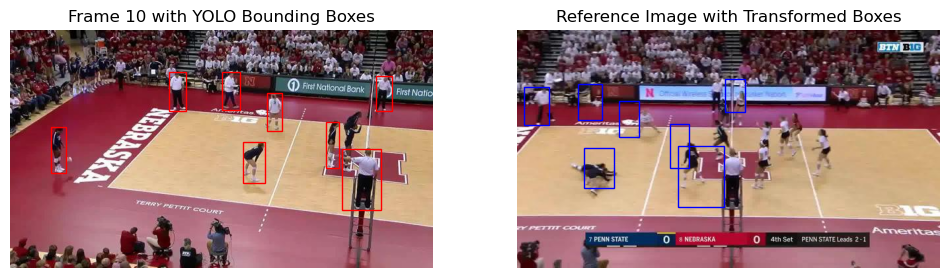

Corresponding image for frame 11: img_0011.jpg


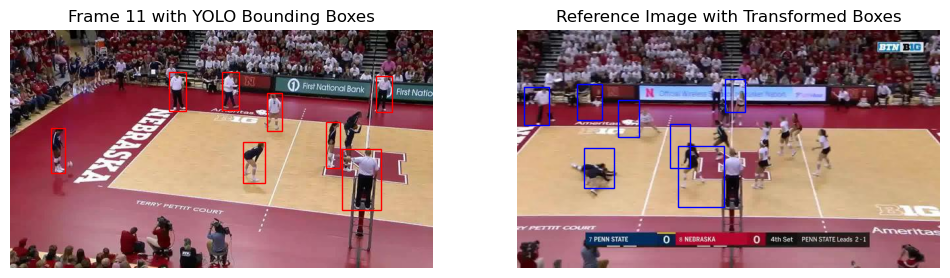

Corresponding image for frame 12: img_0012.jpg


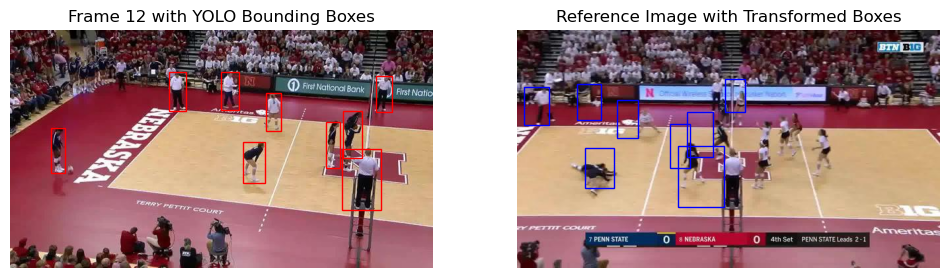

Corresponding image for frame 13: img_0013.jpg


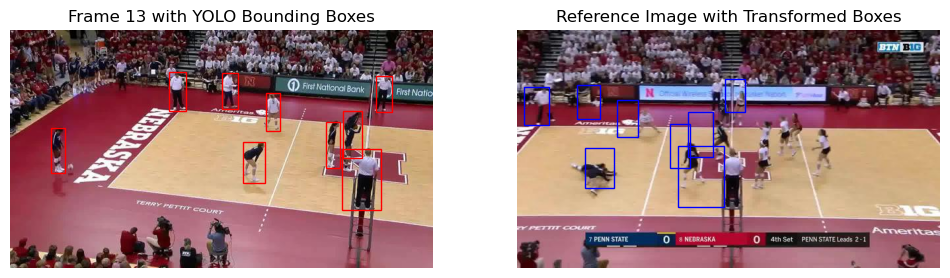

In [57]:
import os
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import cv2

def visualize_yolo_and_reference(input_dir, output_dir, reference_image_path, start_frame, end_frame):
    """
    Visualize frames with bounding boxes from YOLO and their transformed boxes on the reference image.
    input_dir: Directory containing the input YOLO .mat files and images.
    output_dir: Directory containing the transformed YOLO output .mat files.
    reference_image_path: Path to the reference image.
    start_frame: Starting frame number.
    end_frame: Ending frame number.
    """
    # Load the reference image
    reference_image = cv2.imread(reference_image_path)
    reference_image = cv2.cvtColor(reference_image, cv2.COLOR_BGR2RGB)

    # Get sorted lists of input images and YOLO files
    input_images = sorted([f for f in os.listdir(input_dir) if f.startswith("img_") and f.endswith(".jpg")])
    yolo_files = sorted([f for f in os.listdir(input_dir) if f.startswith("yolo_") and f.endswith(".mat")])
    yolo_output_files = sorted([f for f in os.listdir(output_dir) if f.startswith("yolooutput_") and f.endswith(".mat")])



    for i in range(start_frame-1, end_frame):

        print(f"Corresponding image for frame {i + 1}: {input_images[i]}")
        # Load the input image
        image_path = os.path.join(input_dir, input_images[i])
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Load the YOLO input and output data
        yolo_path = os.path.join(input_dir, yolo_files[i])
        yolo_data = loadmat(yolo_path)
        yolo_output_path = os.path.join(output_dir, yolo_output_files[i])
        yolo_output_data = loadmat(yolo_output_path)

        # Debugging: Print the shapes of the bounding boxes and their values
        #print(f"Frame {i + 1} YOLO input bounding boxes shape: {yolo_data['xyxy'].shape}")
        #print(f"Frame {i + 1} YOLO input bounding boxes: {yolo_data['xyxy'][:4]}")
        #print(f"Frame {i + 1} YOLO output bounding boxes shape: {yolo_output_data['xyxy'].shape}")
        #print(f"Frame {i + 1} YOLO output bounding boxes: {yolo_output_data['xyxy'][:4]}")

        # Print the homographies
        homography_data = loadmat(os.path.join(output_dir, "homographies.mat"))
        homography_matrix = homography_data['H'][:, :, i]
        #print(f"Frame {i + 1} Homography matrix:\n{homography_matrix}")


        # Plot original frame with bounding boxes
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))

        axes[0].imshow(image)
        axes[0].set_title(f"Frame {i + 1} with YOLO Bounding Boxes")
        axes[0].axis('off')
        for box in yolo_data['xyxy']:
            x1, y1, x2, y2 = box
            axes[0].add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='red', facecolor='none'))

        # Plot reference image with transformed bounding boxes
        axes[1].imshow(reference_image)
        axes[1].set_title("Reference Image with Transformed Boxes")
        axes[1].axis('off')
        for box in yolo_output_data['xyxy']:
            x1, y1, x2, y2 = box
            axes[1].add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='blue', facecolor='none'))

        plt.show()

# Visualize frames 240 to 250
input_dir = "/home/jovyan/Projeto_PIV/data/1.2/volley/input"
output_dir = "/home/jovyan/Projeto_PIV/data/1.2/volley/output"
reference_image_path = "/home/jovyan/Projeto_PIV/data/1.2/volley/reference/img_ref.jpg"

visualize_yolo_and_reference(input_dir, output_dir, reference_image_path, start_frame=243, end_frame=244)


## Consecutive images


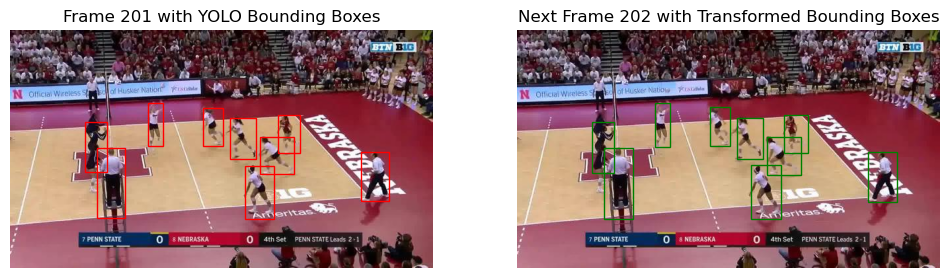

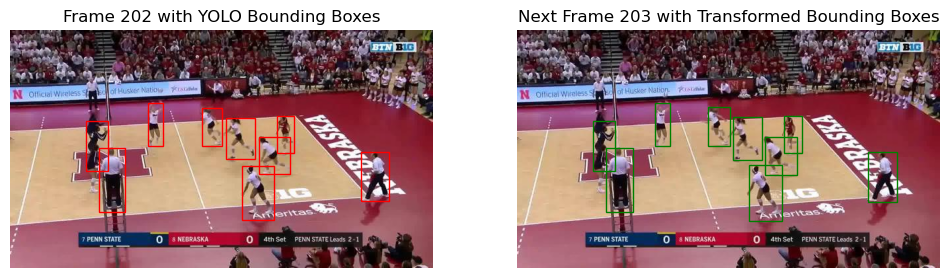

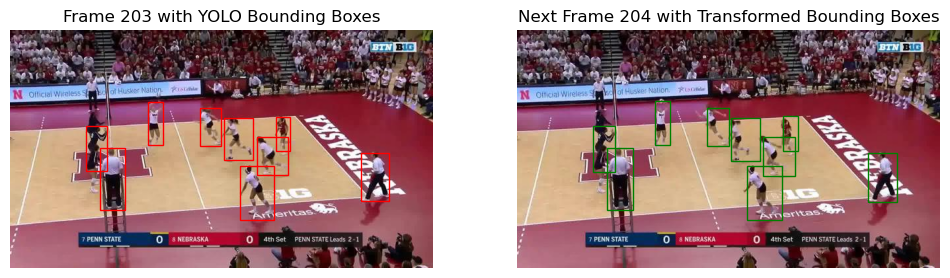

In [51]:
def visualize_consecutive_frames(input_dir, output_dir, start_frame, end_frame):
    """
    Visualize consecutive frames with bounding boxes and the next frame with bounding boxes based on the homography file.
    input_dir: Directory containing the input YOLO .mat files and images.
    output_dir: Directory containing the transformed YOLO output .mat files.
    start_frame: Starting frame number.
    end_frame: Ending frame number.
    """
    # Get sorted lists of input images and YOLO files
    input_images = sorted([f for f in os.listdir(input_dir) if f.startswith("img_") and f.endswith(".jpg")])
    yolo_files = sorted([f for f in os.listdir(input_dir) if f.startswith("yolo_") and f.endswith(".mat")])
    #yolo_output_files = sorted([f for f in os.listdir(output_dir) if f.startswith("yolooutput_") and f.endswith(".mat")])

    for i in range(start_frame, end_frame):
        # Load the input image and the next frame image
        image_path = os.path.join(input_dir, input_images[i])
        next_image_path = os.path.join(input_dir, input_images[i + 1])
        image = cv2.imread(image_path)
        next_image = cv2.imread(next_image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        next_image = cv2.cvtColor(next_image, cv2.COLOR_BGR2RGB)

        # Load the YOLO input and output data
        yolo_path = os.path.join(input_dir, yolo_files[i])
        yolo_data = loadmat(yolo_path)
        #yolo_output_path = os.path.join(output_dir, yolo_output_files[i])
        #yolo_output_data = loadmat(yolo_output_path)

        # Load the homography matrix for the current frame
        homographies_data = loadmat(os.path.join(output_dir, "consecutive_homographies.mat"))
        homographies = homographies_data['H']
        homography_matrix = homographies[:, :, i]

        # Plot original frame with bounding boxes
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))

        axes[0].imshow(image)
        axes[0].set_title(f"Frame {i + 1} with YOLO Bounding Boxes")
        axes[0].axis('off')
        for box in yolo_data['xyxy']:
            x1, y1, x2, y2 = box
            axes[0].add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='red', facecolor='none'))

        # Plot next frame with bounding boxes based on homography
        axes[1].imshow(next_image)
        axes[1].set_title(f"Next Frame {i + 2} with Transformed Bounding Boxes")
        axes[1].axis('off')
        for box in yolo_data['xyxy']:
            x1, y1, x2, y2 = box
            points = np.array([[x1, y1], [x2, y1], [x2, y2], [x1, y2]], dtype='float32')
            points = cv2.perspectiveTransform(np.array([points]), homography_matrix)[0]
            transformed_box = cv2.boundingRect(points)
            x1, y1, w, h = transformed_box
            axes[1].add_patch(plt.Rectangle((x1, y1), w, h, edgecolor='green', facecolor='none'))

        plt.show()

visualize_consecutive_frames(input_dir, output_dir, start_frame=1, end_frame=6)

# Print the consecutive homographies for the first 3 images
#homographies_data = loadmat(os.path.join(output_dir, "consecutive_homographies.mat"))
#homographies = homographies_data['H']
#for i in range(3):
#    print(f"Consecutive Homography for Frame {i + 1} to Frame {i + 2}:\n{homographies[:, :, i]}\n")